# Renewable resources: Fisheries model

----------
- Leon Bremer - Vrije Universiteit Amsterdam & Tinbergen Institute
- Last update: February 26, 2025
- Course: Environmental and Resource Economics (ERE) for MSc STREEM
- Objective: Provide a visualization of the fisheries model discussed in class
----------

This notebook plots a few graphs of the fisheries model seen in the tutorial. It is written in Python (specifically, in a Jupyter notebook). Note that it does not provide a full analysis of the model, but it provides you with some additional visualizations. No need to understand the Python code, but feel free to play around with it by downloading the code from my [GitHub page](https://github.com/Leonbremer/fisheries). Feedback is welcome. Suggestions for better coding? Please reach out to me :)

## Setup

In [1]:
# Packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Global parameters
k = 10*10**6# max supported fish stock
alpha = .00075# ease-of-harvesting parameter
gamma = .1# natural fish growth parameter

Let's define the functions in our model, so we can call them later. Recall the model's functions.
- Harvesting: $h_i = h(\alpha, S, e_i) = \alpha S e_i$ with $S \geq 0$, $\alpha>0$, $e_i \geq 0$.
- Regeneration: $G(S) = \gamma S \left( 1 - \frac{S}{K} \right)$ with $\gamma > 0$ and $K > 0$.
- Costs of effort: $e_i \bar{w}$

To work with them, we code them up.

In [3]:
# Regeneration function
def G(gamma, S, K):
    g = gamma * S * (1 - S/K)
    return g

# Harvesting function
def H(alpha, S, e):
    h = alpha * S * e
    return h

# Costs
def c(e, w):
    cost = e * w
    return cost

def profit(alpha,S,p,w,e):
    pi = H(alpha,S,e)*p - c(e,w)
    return pi

We can visualize the harvesting and regeneration functions.

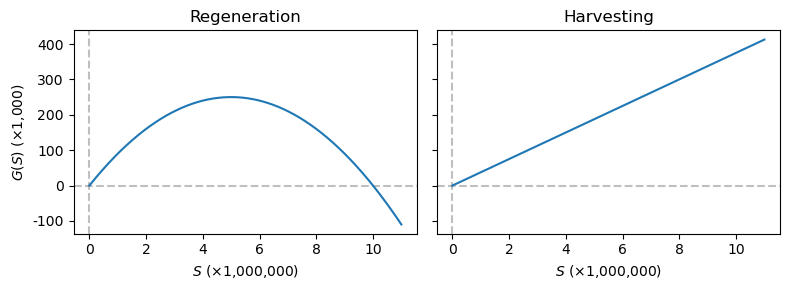

In [4]:
m = 10**6# Maximum S to plot, beyond k
t = 10**3# Steps for plotting granularity
s = np.linspace(0,k+m,t)# Domain of plot
# Biological equilibrium
fig, (ax0,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(8, 3),sharey=True,sharex=True)
# Plot on both subplots
for ax in [ax0,ax1]:
    ax.axhline(0,linestyle='--',color="grey",alpha=.5)
    ax.axvline(0,linestyle='--',color="grey",alpha=.5)
    ax.set_xlabel(r'$S$ ($\times$1,000,000)')
    ax.xaxis.set_major_formatter(lambda s,t: "{:,.0f}".format(s/10**6))#print label in millions
    ax.yaxis.set_major_formatter(lambda s,t: "{:,.0f}".format(s/10**3))

ax0.plot(s, G(gamma=gamma, S=s, K=k), label=r'$G(S)$')
ax1.plot(s, H(alpha,S=s,e=50), label=r'$G(S)$')

ax0.set_ylabel(r'$G(S)$ ($\times$1,000)')
# Plot information
ax0.set_title('Regeneration')
ax1.set_title('Harvesting')
plt.tight_layout()
plt.show()

## Biological equilibrium

Let us first look at the natural fish stock by plotting the regeneration function. This presents the dynamics of $S$ if there is no harvesting.

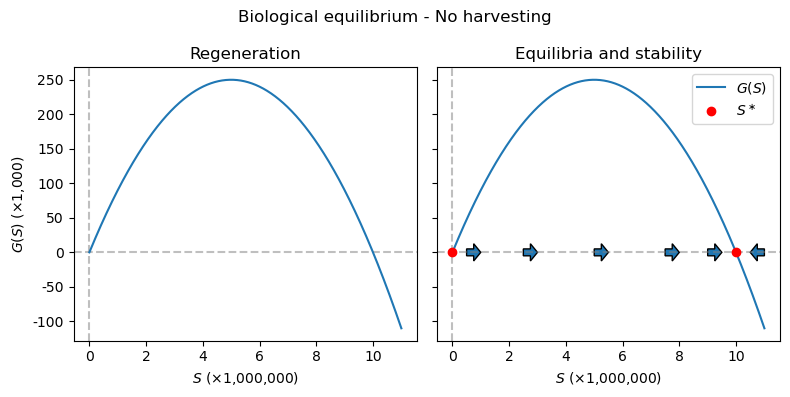

In [5]:
# Biological equilibrium
fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharey = True)
# Plot on both subplots
for ax in [ax0,ax1]:
    ax.axhline(0,linestyle='--',color="grey",alpha=.5)
    ax.axvline(0,linestyle='--',color="grey",alpha=.5)
    ax.plot(s, G(gamma=gamma, S=s, K=k), label=r'$G(S)$')
    ax.set_xlabel(r'$S$ ($\times$1,000,000)')
    ax.xaxis.set_major_formatter(lambda s,t: "{:,.0f}".format(s/10**6))
    ax.yaxis.set_major_formatter(lambda s,t: "{:,.0f}".format(s/10**3))
# Separate additions per subplot
for h in [.5, 2.5, 5, 7.5, 9]:
    ax1.arrow(x=h*m, y=0, dx=.5*m, dy=0, width=10*t, length_includes_head=True, head_width=25*t, head_length=.25*m)
ax1.arrow(x=k*1.1, y=0, dx=-.5*m, dy=0, width=10*t, length_includes_head=True, head_width=25*t, head_length=.25*m)
ax1.plot([0,10*m,], [0,0,], 'ro', label=r'$S^\ast$')
ax0.set_ylabel(r'$G(S)$ ($\times$1,000)')
# Plot information
fig.suptitle('Biological equilibrium - No harvesting')
ax0.set_title('Regeneration')
ax1.set_title('Equilibria and stability')
plt.tight_layout()
ax1.legend()
plt.show()

This shows the natural regeneration of the renewable resource. We note that there are TWO biological equilibriums, which can be found by setting $G(S) = 0$ (i.e. the situation in which there are no natural changes to the fish population). This results in (1) $S=K=10$ million or (2) $S=0$. The first equilibrium occurs because beyond 10 million fish the growth in fish stock is negative, as the ocean reached its capacity to support fish and the net growth of fish is negative (starvation, diseases kill more fish than birth can produce additional fish). The second equilibrium is an extinction equilibrium. 0 fish cannot reproduce. The first (second) equilibrium is stable (unstable), meaning that small deviations from the equilibrium will (not) result in a gravitation back to that same equilibrium, as indicated with the arrows.

Also note the maximum growth halfway $K$. This is the maximum sustainable harvesting. If the stock is at $\frac{1}{2}K$, the regeneration is at its maximum. In that situation, one could harvest that amount of fish each period without altering the fish population ($S$ remains $\frac{1}{2}K$). Hence, sustainable. Note that any harvest between 0 and the max sustainable harvest can be sustainable (i.e. continued indefinitely). However they will result in different stocks.

### Growth over time

We can also plot the fish stock over time. The following plots start with an initial stock $S_0$ and show how many periods it takes to (nearly) rebound to its full capacity $K$. (We do still do not introduce harvesting yet.)

In [6]:
def stock_time(S0,periods):
    """
    Generates sequence of stocks over time using earlier defined functions.

    Returns both the sequences of stocks, as well as the last stock.
    """
    # Initial stock
    stocks = [S0]
    stock_old = S0
    for t in range(1,periods+1):
        stock_new = stock_old + G(gamma,stock_old,k)
        stocks.append(stock_new)
        stock_old = stock_new
    return (stocks,stock_new)

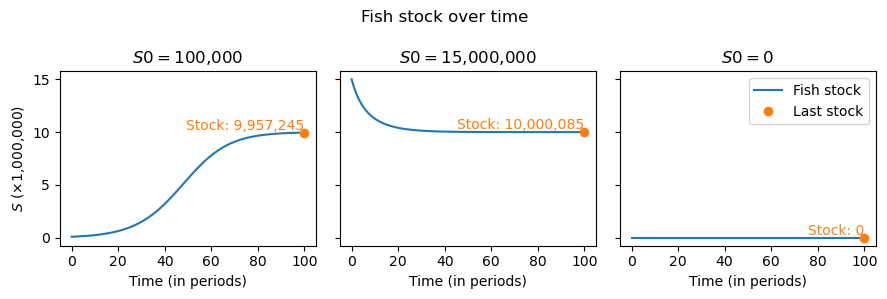

In [7]:
T = np.arange(101)# Periods to simulate
S0s = [k/100,k*1.5,0]# Different starting stocks

# Biological equilibria
fig, (ax0,ax1,ax2) = plt.subplots(nrows=1, ncols=3, figsize=(9, 3), sharey = True)
for (ax,S0) in zip([ax0,ax1,ax2],S0s):
    (stocks,stock_last) = stock_time(S0,periods=T[-1])
    ax.plot(T, stocks, label='Fish stock')
    ax.plot(T[-1],stock_last,color='tab:orange',marker='o',linestyle='none',label='Last stock')
    ax.annotate('Stock: '+"{:,.0f}".format(stock_last),xy=(T[-1],stock_last),
                ha='right',va='bottom',color='tab:orange')
    ax.set_title(r'$S0=$'+"{:,.0f}".format(S0))
    ax.set_xlabel(r'Time (in periods)')
    ax.yaxis.set_major_formatter(lambda s,t: "{:,.0f}".format(s/10**6))

fig.suptitle('Fish stock over time')
ax0.set_ylabel(r'$S$ ($\times$1,000,000)')
plt.tight_layout()
ax2.legend()
plt.show()

In the left plot, the initial stock is only 1\% of the natural capacity ($S_0 = \frac{K}{100}$), but within 100 periods the stock nearly rebounds to $K$. In the middle plot the population is far above the carrying capacity of the ocean (50% above $K$) and the stock quickly returns to $K$. In the last plot fish are extinct and the population does not recover.

Note that these dynamcis are directly derived from the generation function $G$. For yourself make sure that you understand how $G$ produces these dynamics. Take a starting stock $S_0$, find $G$, calculate the stock in the next period ($S_1 = S_0 + G(S_0)$), find $G$ at $S_1$, etc.

## Fishing

We now add fishers to the mix. Together with the regeneration function, harvesting determines the change in stock over time. Or mathematically, $\Delta S = G(S) - H$.

One can solve for the bio-harvesting equilibrium, finding that $S^b = (1 - \frac{\alpha}{\gamma}E)K$ (or in the extinction case: $S^b=0$). Let's use this in our visualization.

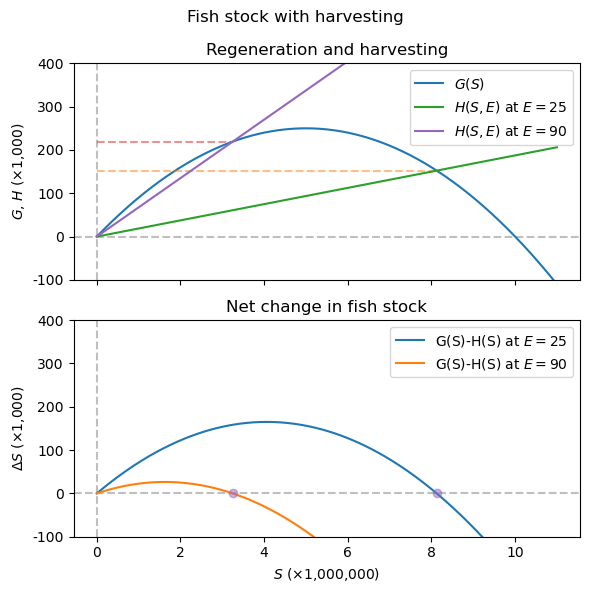

In [8]:
# Plot
fig, (ax0,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(6, 6),sharex=True,sharey=True)
for ax in [ax0,ax1]:
    ax.axhline(0,linestyle='--',color="grey",alpha=.5)
    ax.axvline(0,linestyle='--',color="grey",alpha=.5)
    ax.xaxis.set_major_formatter(lambda s,t: "{:,.0f}".format(s/10**6))
    ax.yaxis.set_major_formatter(lambda s,t: "{:,.0f}".format(s/10**3))
ax0.plot(s, G(gamma=gamma, S=s, K=k), label=r'$G(S)$')
for E in [25,90]:
    Sb = (1 - (alpha/gamma)*E)*k
    ax0.plot([0,Sb],[H(alpha,Sb,E),H(alpha,Sb,E)],alpha=.5,linestyle='dashed')
    ax0.plot(s,H(alpha,s,E),label=r'$H(S,E)$ at $E=$'+str(E))
    ax1.plot(s,G(gamma=gamma,S=s,K=k)-H(alpha,s,E),
             label=r'G(S)-H(S) at $E=$'+str(E))
    ax1.plot(Sb,0,color='tab:purple',marker='o',alpha=.5)
ax1.set_xlabel(r'$S$ ($\times$1,000,000)')
ax0.set_ylabel(r'$G$, $H$ ($\times$1,000)')
ax1.set_ylabel(r'$\Delta S$ ($\times$1,000)')
fig.suptitle('Fish stock with harvesting')
ax0.legend()
ax1.legend()
ax0.set_title('Regeneration and harvesting')
ax1.set_title('Net change in fish stock')
plt.tight_layout()
plt.ylim(-10**5,4*10**5)
plt.show()

These plots show how regeneration changes the fish stock and how harvesting changes the fish stock. The net change is depicted by the bottom plot. The plots visualize two situations. One for low total effort and one for high total effort. Note how they change the fish stock, but also the periodical harvesting.

An interesting observation is that the maximum sustainable harvest is somewhere in between these situations. **Compared to the high-effort situation, there is an opportunity to exert less effort AND achieve a higher periodical harvest AND retain a higher fish population.** Win-win-win (but these wins are often not realized due to coordination issues; see below).

### Free entry

Now we turn to the economics. Because in reality we frequently see bad fishing outcomes (even though there are win-win-wins...). The reason we observe those outcomes is because of the lack of coordination. Game theory provides a good framework for such situations. It tries to understand the individuals choices when strategically interacting with others. We will see that without coordination individual fishers will maximize profits by exerting effort levels that in total are higher than the effort levels of the win-win-win situation.

The free entry condition pins down the economic equilibrium stock at which no further profits are possible. If there are positive or negative profits, firms would enter or exit the market (i.e. more or less total effort).

The free entry condition states
$$\sum_i \pi_i = 0$$
$$S^e = \frac{\bar{w}}{\alpha \bar{p}} \quad\text{ for } E>0$$
which provides the only stock $S$ at which there are no profits.

Looking at the profit function ($\pi_i = (\alpha S \bar{p} - \bar{w})e_i$) we indeed see that changing $e_i$ does not make the profit function positive or negative. The only variable that determines the sign of the profit function is $S$. In order to have no profits, $S$ must be exactly $S^e$.

Intuitively this can be explained as follows. If $S$ is large, harvesting is more profitable, leading to more harvesting efforts. This increase in $e$ will put downward pressure on $S$. Only when $S = S^e$, there will be no more adjustments to $E$.

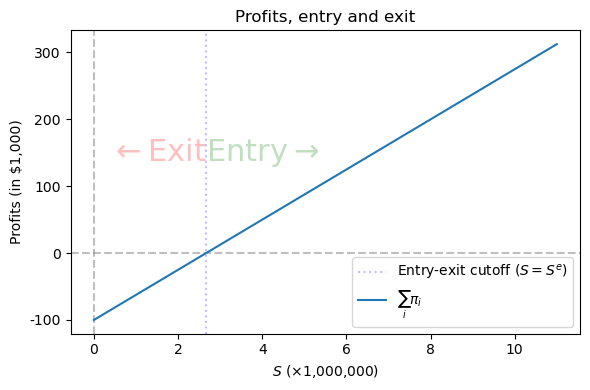

In [9]:
# Numbers
w=2_000
p=1

# From your derivations
Ess = (gamma/alpha)*(1-(w/(alpha*p*k)))
Se = w/(alpha*p)

# Plot
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6, 4))
ax.axhline(0,linestyle='--',color="grey",alpha=.5)
ax.axvline(0,linestyle='--',color="grey",alpha=.5)
ax.axvline(Se,linestyle=':',color="blue",alpha=.25, label='Entry-exit cutoff ($S=S^e$)')
ax.plot(s, profit(alpha,s,p,w,e=50), label=r'$\sum_i \pi_i$')
ax.text(x=Se,
        y=150*10**3,
        s=r'$\leftarrow$Exit',
        color="red",
        alpha=.25,
        horizontalalignment='right',
        verticalalignment='center',
        fontsize=22)
ax.text(x=Se,
        y=150*10**3,
        s=r'Entry$\rightarrow$',
        color="green",
        alpha=.25,
        horizontalalignment='left',
        verticalalignment='center',
        fontsize=22)
ax.xaxis.set_major_formatter(lambda s,t: "{:,.0f}".format(s/10**6))
ax.yaxis.set_major_formatter(lambda s,t: "{:,.0f}".format(s/10**3))
ax.set_xlabel(r'$S$ ($\times$1,000,000)')
ax.set_ylabel(r'Profits (in $1,000)')
ax.set_title('Profits, entry and exit')
ax.legend()
plt.tight_layout()
plt.show()

Since there is only one stock for which there are no profits, this must be the steady state stock of fish. Now we can go back to the earlier biological equilibrium and find the total effort that leads to this $S$.

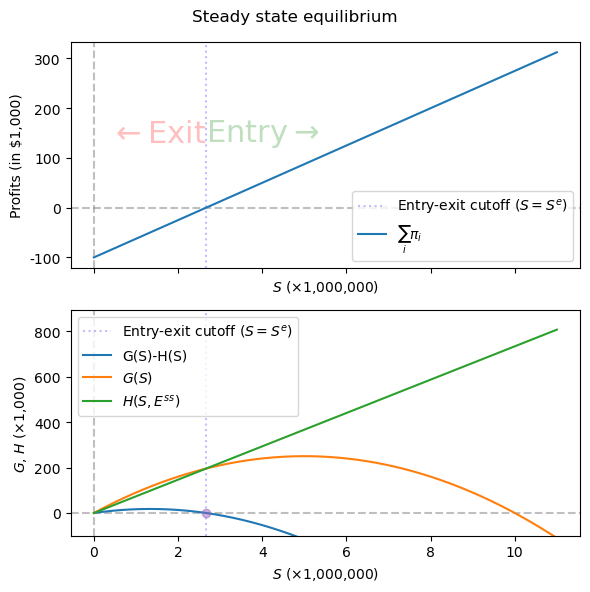

In [10]:
# Plot
fig, (ax0,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(6,6),sharex=True)
for ax in [ax0,ax1]:
    ax.axhline(0,linestyle='--',color="grey",alpha=.5)
    ax.axvline(0,linestyle='--',color="grey",alpha=.5)
    ax.axvline(Se,linestyle=':',color="blue",alpha=.25, label='Entry-exit cutoff ($S=S^e$)')
    ax.set_xlabel(r'$S$ ($\times$1,000,000)')
    ax.xaxis.set_major_formatter(lambda s,t: "{:,.0f}".format(s/10**6))
    ax.yaxis.set_major_formatter(lambda s,t: "{:,.0f}".format(s/10**3))
ax0.plot(s, profit(alpha,s,p,w,e=50), label=r'$\sum_i \pi_i$')
ax0.text(x=Se,
        y=150*10**3,
        s=r'$\leftarrow$Exit',
        color="red",
        alpha=.25,
        horizontalalignment='right',
        verticalalignment='center',
        fontsize=22)
ax0.text(x=Se,
        y=150*10**3,
        s=r'Entry$\rightarrow$',
        color="green",
        alpha=.25,
        horizontalalignment='left',
        verticalalignment='center',
        fontsize=22)
ax1.plot(s,G(gamma=gamma,S=s,K=k)-H(alpha,s,Ess),
         label=r'G(S)-H(S)')
ax1.plot(s,G(gamma=gamma,S=s,K=k),label=r'$G(S)$')
ax1.plot(s,H(alpha,s,Ess),label=r'$H(S,E^{ss})$')
ax1.plot(Se,0,color='tab:purple',marker='o',alpha=.5)

ax0.legend()
ax1.legend()
ax0.set_ylabel(r'Profits (in $1,000)')
ax1.set_ylabel(r'$G$, $H$ ($\times$1,000)')
ax1.set_ylim(-100_000,)
fig.suptitle('Steady state equilibrium')
plt.tight_layout()
plt.show()

And the number of firms is the total level of effort $E$.

In [11]:
print('Number of firms in the market:', "~", round(Ess,2))

Number of firms in the market: ~ 97.78
